In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_excel('Adidas US Sales Datasets.xlsx')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9649 non-null   object 
 2   Unnamed: 2   9650 non-null   object 
 3   Unnamed: 3   9649 non-null   object 
 4   Unnamed: 4   9649 non-null   object 
 5   Unnamed: 5   9649 non-null   object 
 6   Unnamed: 6   9649 non-null   object 
 7   Unnamed: 7   9649 non-null   object 
 8   Unnamed: 8   9649 non-null   object 
 9   Unnamed: 9   9649 non-null   object 
 10  Unnamed: 10  9649 non-null   object 
 11  Unnamed: 11  9649 non-null   object 
 12  Unnamed: 12  9649 non-null   object 
 13  Unnamed: 13  9649 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df = df.drop(labels=[0,1,2], axis=0)

In [6]:
df.columns = df.iloc[0]

In [7]:
df = df.drop(labels=3, axis=0)

In [8]:
df = df.reset_index(drop=True)

In [9]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


## Data Analysis

In [11]:
df.describe()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648.0,9648,9648.0,9648.0,9648.00,9648
unique,6,4,724,5,50,52,6,146.0,361,3512.0,6510.0,127.00,3
top,Foot Locker,1185732,2021-01-17 00:00:00,West,California,Portland,Men's Street Footwear,50.0,225,100000.0,21000.0,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557.0,207,52.0,34.0,1229.00,4889


In [12]:
top_products= df[['Product','Total Sales']].groupby('Product').sum()
top_products

3,Total Sales
Product,
Men's Apparel,123728632.0
Men's Athletic Footwear,153673680.0
Men's Street Footwear,208826244.0
Women's Apparel,179038860.0
Women's Athletic Footwear,106631896.0
Women's Street Footwear,128002813.0


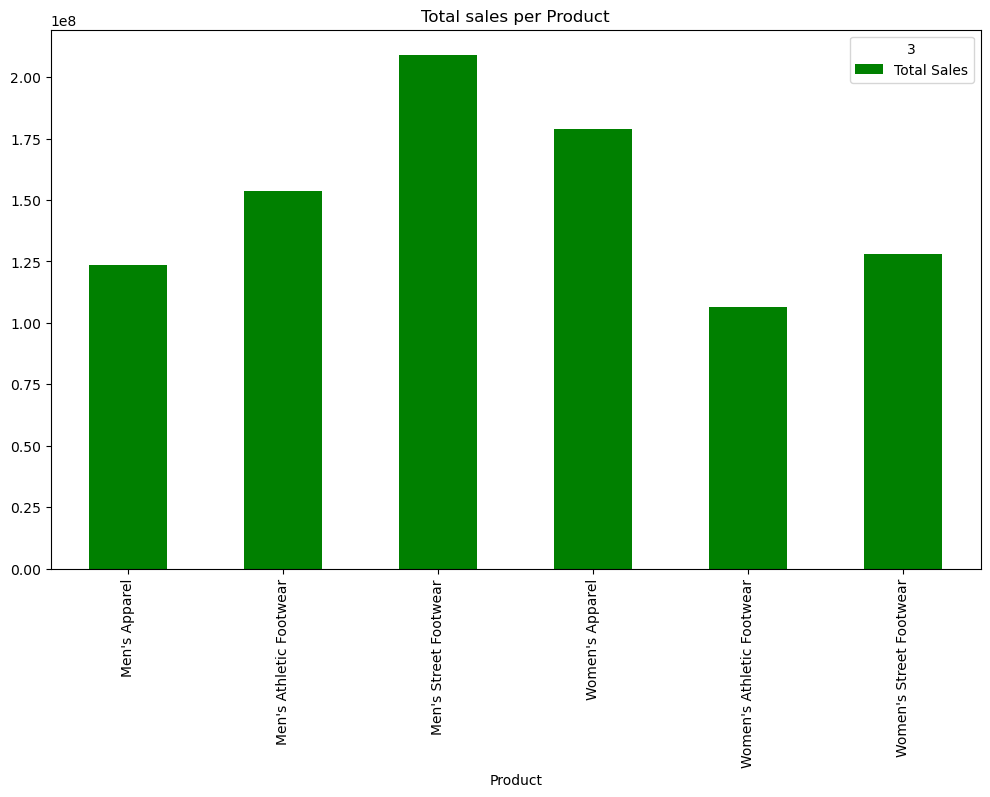

In [101]:
top_products.plot(kind='bar',figsize=(12,7),title='Total sales per Product',color = 'g')
plt.show()

### Men's Street Footwear has the highest sales amount

In [14]:
top_retailers = df[['Retailer','Total Sales']].groupby('Retailer').sum()
top_retailers

3,Total Sales
Retailer,
Amazon,77698912.0
Foot Locker,220094720.0
Kohl's,102114753.0
Sports Direct,182470997.0
Walmart,74558410.0
West Gear,242964333.0


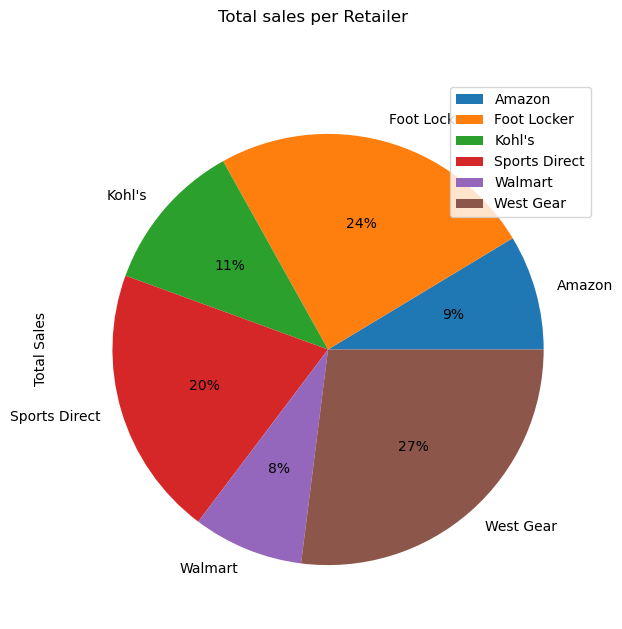

In [99]:
top_retailers.plot(kind='pie',subplots=True,figsize=(12,7),title='Total sales per Retailer',autopct='%1.0f%%');

### West Gear has the highest sales amount

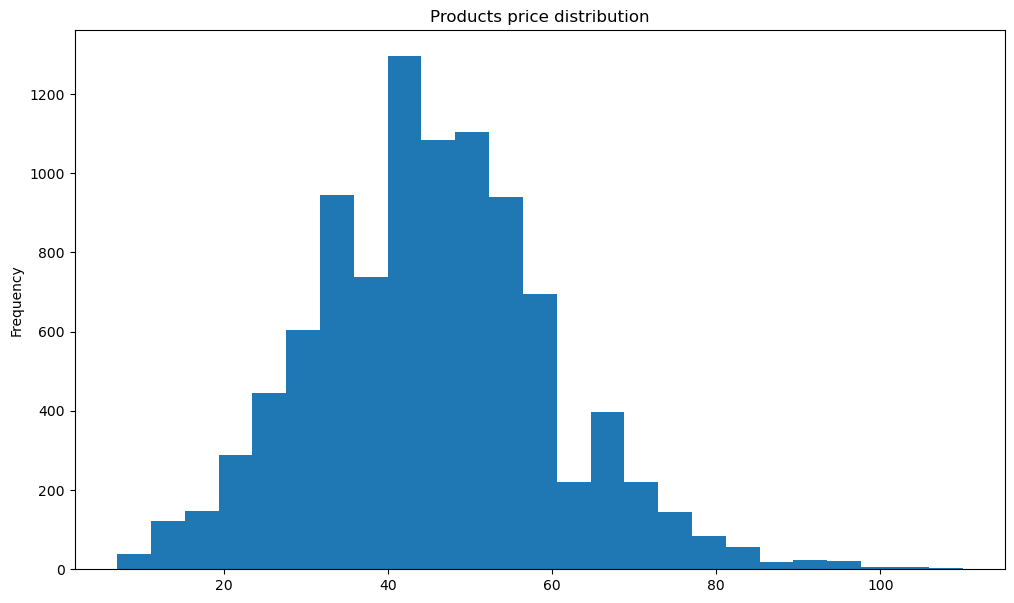

In [92]:
df['Price per Unit'].plot(kind='hist',bins=25,figsize=(12,7),title='Products price distribution');

In [17]:
df['Price per Unit'].mean()

45.21662520729685

### Most of the price range between  40 − 60 and the average product price is $45.22

In [18]:
top_salesmt = df[['Sales Method','Total Sales']].groupby('Sales Method').sum()
top_salesmt

3,Total Sales
Sales Method,
In-store,356643750.0
Online,247672882.0
Outlet,295585493.0


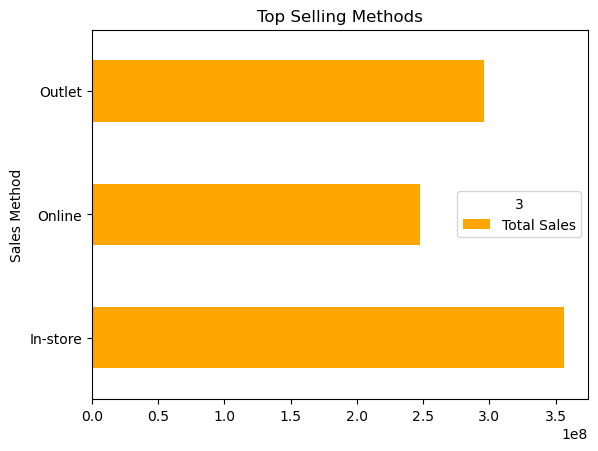

In [85]:
top_salesmt.plot(kind='barh',title='Top Selling Methods',color = 'orange');

### It's clear that retailers sell more products in-store

## Machine Learning Part

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

### Creating a copy

In [21]:
df2 = df.copy()

In [22]:
df2['Region']=pd.factorize(df2.Region)[0]
df2['State']=pd.factorize(df2.State)[0]
df2['City']=pd.factorize(df2.City)[0]
df2['Product']=pd.factorize(df2.Product)[0]
df2['Retailer']=pd.factorize(df2.Retailer)[0]

In [23]:
df2.rename(columns = {'Sales Method':'Method'}, inplace = True)

In [24]:
df2['Method']=pd.factorize(df2.Method)[0]

In [25]:
df2 = df2.drop('Retailer ID',axis=1)

In [26]:
df2 = df2.drop('Invoice Date',axis=1)

In [27]:
df2.head()

3,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Method
0,0,0,0,0,0,50,1200,600000,300000,0.5,0
1,0,0,0,0,1,50,1000,500000,150000,0.3,0
2,0,0,0,0,2,40,1000,400000,140000,0.35,0
3,0,0,0,0,3,45,850,382500,133875,0.35,0
4,0,0,0,0,4,60,900,540000,162000,0.3,0


In [28]:
df2['Units Sold'] = df2['Units Sold'].astype(int)
df2['Total Sales'] = df2['Total Sales'].astype(int)
df2['Operating Profit'] = df2['Operating Profit'].astype(int)
df2['Retailer'] = df2['Retailer'].astype(int)

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   int32 
 1   Region            9648 non-null   int64 
 2   State             9648 non-null   int64 
 3   City              9648 non-null   int64 
 4   Product           9648 non-null   int64 
 5   Price per Unit    9648 non-null   object
 6   Units Sold        9648 non-null   int32 
 7   Total Sales       9648 non-null   int32 
 8   Operating Profit  9648 non-null   int32 
 9   Operating Margin  9648 non-null   object
 10  Method            9648 non-null   int64 
dtypes: int32(4), int64(5), object(2)
memory usage: 678.5+ KB


### Finding correlation between Features:

In [30]:
corr=df2.corr()

In [31]:
print(corr)

3                 Retailer    Region     State      City   Product  \
3                                                                    
Retailer          1.000000 -0.097952  0.096816  0.096194  0.002262   
Region           -0.097952  1.000000 -0.209003 -0.176060 -0.000121   
State             0.096816 -0.209003  1.000000  0.976045  0.000367   
City              0.096194 -0.176060  0.976045  1.000000  0.000393   
Product           0.002262 -0.000121  0.000367  0.000393  1.000000   
Units Sold        0.007130  0.095324 -0.251792 -0.244089 -0.177418   
Total Sales       0.016339  0.079305 -0.158281 -0.151011 -0.055138   
Operating Profit  0.012788  0.072539 -0.145209 -0.137264 -0.054475   
Method           -0.005612  0.130336 -0.013363 -0.011398 -0.000524   

3                 Units Sold  Total Sales  Operating Profit    Method  
3                                                                      
Retailer            0.007130     0.016339          0.012788 -0.005612  
Region       

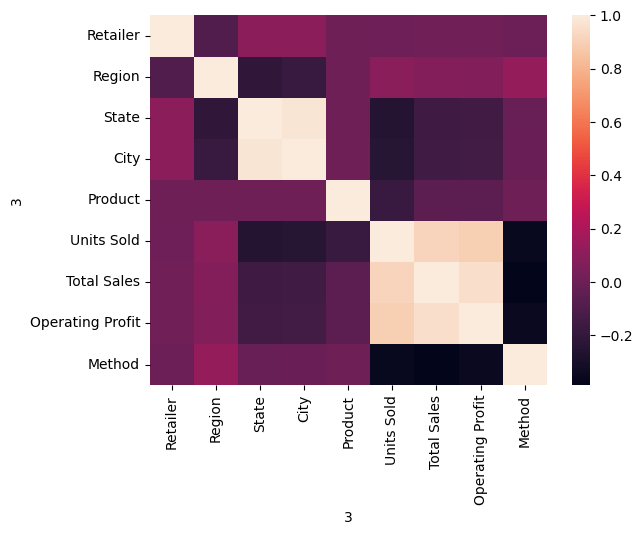

In [32]:
sns.heatmap(corr);

### We can see that Total Sales has obviously, a high colleration with operating profit, price per unit and units sold.
### But on the other hand, features like Region and retailer can make an impact on the Total sales amount.

## Total Sales prediction using multiple linear regression model:

In [33]:
X = df2.values[:,(0,1,2,3,4,5,6,8,9,10)]
Y = df2.values[:, 7]

In [34]:
Y

array([600000, 500000, 400000, ..., 7544, 2940, 2407], dtype=object)

In [35]:
X.shape

(9648, 10)

In [36]:
df2.head()

3,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Method
0,0,0,0,0,0,50,1200,600000,300000,0.5,0
1,0,0,0,0,1,50,1000,500000,150000,0.3,0
2,0,0,0,0,2,40,1000,400000,140000,0.35,0
3,0,0,0,0,3,45,850,382500,133875,0.35,0
4,0,0,0,0,4,60,900,540000,162000,0.3,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [38]:
lr= LinearRegression()

### Training the model

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = lr.predict(X_test)

### Calculating R squared value:

In [41]:
r2 = r2_score(y_test, y_pred)

In [42]:
r2

0.9587616577225725

### Predicting Sales amount

In [56]:
df2['sales_pred']= lr.predict(X)

In [68]:
df2['sales_pred'] = df2['sales_pred'].round()

In [69]:
df2.head()

3,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Method,sales_pred
0,0,0,0,0,0,50,1200,600000,300000,0.5,0,702909.0
1,0,0,0,0,1,50,1000,500000,150000,0.3,0,450186.0
2,0,0,0,0,2,40,1000,400000,140000,0.35,0,416060.0
3,0,0,0,0,3,45,850,382500,133875,0.35,0,383273.0
4,0,0,0,0,4,60,900,540000,162000,0.3,0,463924.0


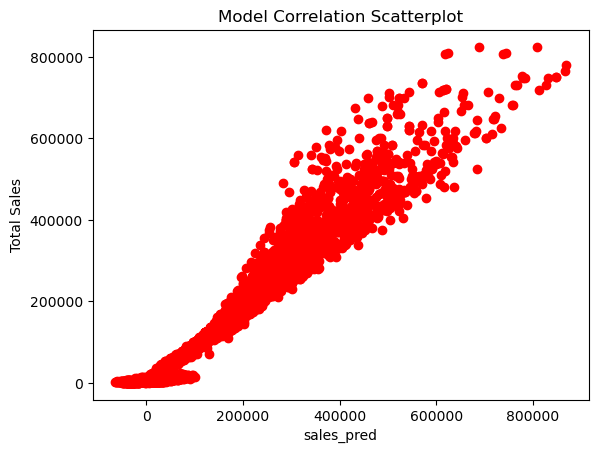

In [94]:
plt.scatter(df2['sales_pred'],df2['Total Sales'],color = 'r')
plt.xlabel("sales_pred")
plt.ylabel("Total Sales")
plt.title('Model Correlation Scatterplot');